Diverse Machine Learning Algorithms:
*   Linear Regression
*   Classfication
*   Clustering
*   Hidden Markov Models


Using a regression algorithm to predict probabilities of Claim on a building

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [6]:
!pip install -q sklearn

In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals
from six.moves import urllib
from IPython.display import clear_output

import tensorflow.compat.v2.feature_column as fc

In [8]:
train_df = pd.read_csv(r'/content/train_data.csv')
test_df = pd.read_csv(r'/content/test_data.csv')
submission = pd.read_csv(r'/content/sample_submission.csv')

In [9]:
train_df.head(2)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0


In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [11]:
train_df.head(1)

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0


In [12]:
train_df.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


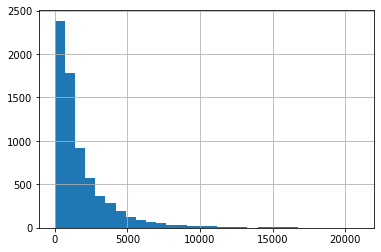

In [13]:
train_df['Building Dimension'].hist(bins=30)

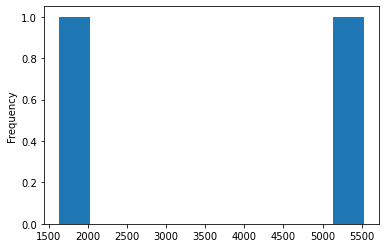

In [14]:
train_df['Claim'].value_counts().plot(kind='hist')

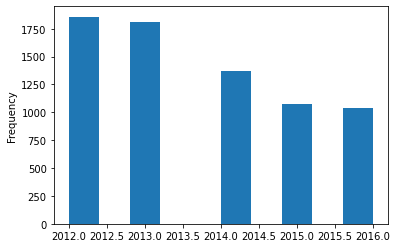

In [15]:
train_df['YearOfObservation'].plot(kind='hist')

In [16]:
train_df.shape

(7160, 14)

In [17]:
train_df.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [19]:
train_df.fillna(train_df.mean(), inplace= True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [20]:
train_df.fillna(train_df.mode(), inplace= True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


In [21]:
train_df.dropna(axis=0, inplace= True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7051 entries, 0 to 7057
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7051 non-null   object 
 1   YearOfObservation   7051 non-null   int64  
 2   Insured_Period      7051 non-null   float64
 3   Residential         7051 non-null   int64  
 4   Building_Painted    7051 non-null   object 
 5   Building_Fenced     7051 non-null   object 
 6   Garden              7051 non-null   object 
 7   Settlement          7051 non-null   object 
 8   Building Dimension  7051 non-null   float64
 9   Building_Type       7051 non-null   int64  
 10  Date_of_Occupancy   7051 non-null   float64
 11  NumberOfWindows     7051 non-null   object 
 12  Geo_Code            7051 non-null   object 
 13  Claim               7051 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 826.3+ KB


In [22]:
categorical_columns = ['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'NumberOfWindows', 'Geo_Code']
numerical_columns = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy']


feature_columns = []
for feature_name in categorical_columns:
  vocabulary = train_df[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in numerical_columns:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='Building_Painted', vocabulary_list=('N', 'V'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Building_Fenced', vocabulary_list=('V', 'N'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Garden', vocabulary_list=('V', 'O'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Settlement', vocabulary_list=('U', 'R'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='NumberOfWindows', vocabulary_list=('   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='Geo_Code', vocabulary_list=('1053', '1143', '1160', '1173', '1224', '1283', '1305', '1363', '1419', '2059', '2173', '2408', '2722', '3095', '3190', '3310', '4070', '4073', '4088', '4094', '4112', '4126', '4166', '4176', '4197', '5004'

In [23]:
feature_columns

[VocabularyListCategoricalColumn(key='Building_Painted', vocabulary_list=('N', 'V'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='Building_Fenced', vocabulary_list=('V', 'N'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='Garden', vocabulary_list=('V', 'O'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='Settlement', vocabulary_list=('U', 'R'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='NumberOfWindows', vocabulary_list=('   .', '4', '3', '2', '5', '>=10', '6', '7', '9', '8', '1'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 VocabularyListCategoricalColumn(key='Geo_Code', vocabulary_list=('1053', '1143', '1160', '1173', '1224', '1283', '1305', '1363', '1419', '2059', '2173', '2408', '2722', '3095', '3190', '3310', '4070', '4073', '4088', '4094', '4112', '4126', '4166', '4176', '4197', '

In [24]:
X = train_df.drop(['Customer Id', 'Claim'], axis=1)
test_set = test_df.drop(['Customer Id'], axis=1, inplace = True)
y = train_df['Claim']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create an input function to convert pandas DataFrame into an Object

In [37]:
def make_input_fn(train_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(train_df), label_df))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fn(X_train, y_train)
eval_input_fn = make_input_fn(X_test, y_test, num_epochs = 2, shuffle= False)

linear_est = tf.estimator.LinearClassifier(feature_columns = feature_columns)

linear_est.train(train_input_fn)
result = linear_est.predict(eval_input_fn)

clear_output()

In [39]:
result = list(linear_est.predict(eval_input_fn))
print(result)

INFO:tensorflow:Calling model_fn.


/usr/local/lib/python3.7/dist-packages/tensorflow_estimator/python/estimator/canned/linear.py:1478: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  getter=tf.compat.v1.get_variable)


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp8tzts14a/model.ckpt-1770
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[{'logits': array([-29.64733], dtype=float32), 'logistic': array([1.331461e-13], dtype=float32), 'probabilities': array([1.000000e+00, 1.331461e-13], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-32.962345], dtype=float32), 'logistic': array([4.8376605e-15], dtype=float32), 'probabilities': array([1.0000000e+00, 4.8376605e-15], dtype=float32), 'class_ids': array([0]), 'classes': array([b'0'], dtype=object), 'all_class_ids': array([0, 1], dtype=int32), 'all_classes': array([b'0', b'1'], dtype=object)}, {'logits': array([-31.477179], dtype=float32), 'logistic': array([2.1361661e-14], dtype=float32), 'probabilit

In [40]:
result[0]['probabilities']

array([1.000000e+00, 1.331461e-13], dtype=float32)